# Assignment 1
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


I am reading in data from June 2015. 

In [2]:
df=pd.read_csv('201506-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# BY GENDER

In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

# KS TEST

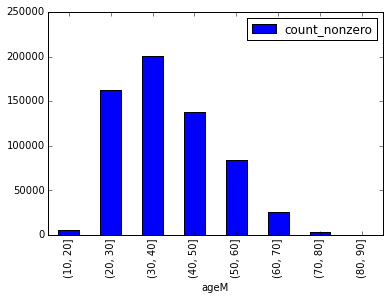

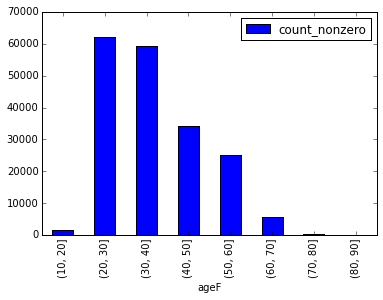

In [4]:
#cumulative distribution
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

We can see that there are more male riders than female riders 200,000 vs. 60,000. The most male riders range from ages 30 - 40, whereas the most female riders are younger from 20 - 30.

          count_nonzero
ageM                   
(10, 20]       0.000033
(20, 30]       0.067160
(30, 40]       0.058401
(40, 50]       0.018044
(50, 60]       0.015117
(60, 70]       0.002513
(70, 80]       0.000238
(80, 90]       0.000000


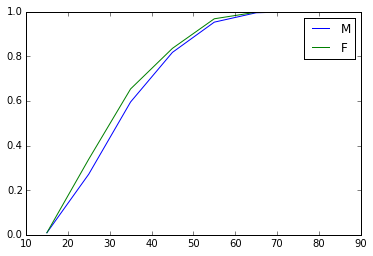

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [6]:
import scipy.stats

# KS tests to compare 2 samples
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [7]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.45996202796586128, 0.0)


# KS test - extra credit

remember: the Null hypothesis is rejected if

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha)$ is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!!

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

In [8]:
n1 = df.ageM[~np.isnan(df.ageM)].count()
n2 = df.ageF[~np.isnan(df.ageF)].count()
print n1, n2

621580 188655


In [9]:
ksinv = 1.36*sqrt((n1+n2)*1.0/(n1*n2))

#using significance level 0.05, c(a) = 1.36
if ks[0] > ksinv:
    print ks[0], ">", ksinv, 'We reject the null hypothesis; these two samples are from the same distribution.'
else:
    print 'We cannot reject the null hypothesis.'

0.459962027966 > 0.00357488217273 We reject the null hypothesis; these two samples are from the same distribution.


# Pearson's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

In [10]:
#scipy.stats.pearsonr(df.ageM, df.ageF)
#returns nan

ageM1 = np.array(df.ageM[~np.isnan(df.ageM)])
ageF1 = np.array(df.ageF[~np.isnan(df.ageF)])

aM = np.random.choice(ageM1, size = 5000)
aF = np.random.choice(ageF1, size = 5000)

scipy.stats.pearsonr(aM, aF)


(-0.0082434228776965685, 0.56005340734522857)

This implies no linear relationship correlation because it is between -1 and +1 with 0.

# Spearman's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [11]:
scipy.stats.spearmanr(aM, aF, axis=0)

(0.0017732641038377566, 0.90024056832290578)

# THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT

# TBC...